# Predicting the prices of Fiat 500 with Linear Regression
I built this model with the aim to apply and better understand the linear regression algorithm

In [43]:
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import scipy as sp
import pandas as pd

## Gather Data

In [44]:
df = pd.read_csv("fiat_500_in_Italy.csv")

In [45]:
df.head()

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51,882,25000,1,44.907242,8.611560,8900
1,pop,51,1186,32500,1,45.666359,12.241890,8800
2,sport,74,4658,142228,1,45.503300,11.417840,4200
3,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,pop,73,3074,106880,1,41.903221,12.495650,5700


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1538 non-null   object 
 1   engine_power     1538 non-null   int64  
 2   age_in_days      1538 non-null   int64  
 3   km               1538 non-null   int64  
 4   previous_owners  1538 non-null   int64  
 5   lat              1538 non-null   float64
 6   lon              1538 non-null   float64
 7   price            1538 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 90.2+ KB


In [47]:
df.isnull().sum(axis=0)

model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

## Exploratory Data Analysis

In [48]:
# machine learning algorithms require numerical input data, so we need to represent categorical columns
# in a numerical column.
from sklearn import preprocessing
# create the label encoder
le = preprocessing.LabelEncoder()
# converting string into numbers
df['model'] = le.fit_transform(df['model'])
df.head(10)

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,0,51,882,25000,1,44.907242,8.611560,8900
1,1,51,1186,32500,1,45.666359,12.241890,8800
2,2,74,4658,142228,1,45.503300,11.417840,4200
3,0,51,2739,160000,1,40.633171,17.634609,6000
4,1,73,3074,106880,1,41.903221,12.495650,5700
5,1,74,3623,70225,1,45.000702,7.682270,7900
6,0,51,731,11600,1,44.907242,8.611560,10750
7,0,51,1521,49076,1,41.903221,12.495650,9190
8,2,73,4049,76000,1,45.548000,11.549470,5600
9,2,51,3653,89000,1,45.438301,10.991700,6000


In [49]:
df.corr()

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,1.000000,0.189906,0.326508,0.319580,0.052480,0.044901,-0.013200,-0.349885
engine_power,0.189906,1.000000,0.319190,0.285495,-0.005030,0.005721,-0.005032,-0.277235
age_in_days,0.326508,0.319190,1.000000,0.833890,0.075775,0.062982,-0.042667,-0.893328
km,0.319580,0.285495,0.833890,1.000000,0.097539,0.035519,0.004839,-0.859373
previous_owners,0.052480,-0.005030,0.075775,0.097539,1.000000,0.001697,-0.026836,-0.076274
lat,0.044901,0.005721,0.062982,0.035519,0.001697,1.000000,-0.766646,-0.011733
lon,-0.013200,-0.005032,-0.042667,0.004839,-0.026836,-0.766646,1.000000,-0.003541
price,-0.349885,-0.277235,-0.893328,-0.859373,-0.076274,-0.011733,-0.003541,1.000000


In [50]:
df.corr().abs().sum() # below I can notice that lon, lat and previous owners are not useful for my study

model              2.296460
engine_power       2.087610
age_in_days        3.554339
km                 3.436236
previous_owners    1.335630
lat                1.929200
lon                1.862762
price              3.471368
dtype: float64

In [51]:
car = df.drop(columns=['previous_owners', 'lat', 'lon'])

In [52]:
car.head()

,model,engine_power,age_in_days,km,price
0,0,51,882,25000,8900
1,1,51,1186,32500,8800
2,2,74,4658,142228,4200
3,0,51,2739,160000,6000
4,1,73,3074,106880,5700


In [53]:
from scipy import stats

z = np.abs(stats.zscore(car))
print(z)

[[0.59301184 0.22685815 0.59652371 0.70930077 0.16706618]
 [1.12784139 0.22685815 0.36070081 0.52195911 0.11550192]
 [2.84869462 5.54228649 2.33264489 2.21892419 2.25645389]
 ...
 [1.12784139 0.22685815 0.44373453 0.17637563 0.55483342]
 [0.59301184 0.22685815 0.70282942 0.68327218 1.33345369]
 [1.12784139 0.22685815 0.08922445 0.02198113 0.34857639]]


In [54]:
car_outliers_Zscore = car[(z<3).all(axis=1)]
car_outliers_Zscore.shape # the shape of my dataset changed. That means there are some outliers in the dataset

(1491, 5)

In [55]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # I want to know the statistical dispersion

model               1.0
engine_power        0.0
age_in_days      1946.0
km              59661.5
price            2877.5
dtype: float64


In [56]:
car_IQR_outlier = car[~((car < (Q1 - 1.5 *IQR)) | (car > (Q3+1.5*IQR))).any(axis=1)]
car_IQR_outlier.shape #remove the outliers

(1445, 5)

C:\Users\moryb\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\moryb\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\moryb\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


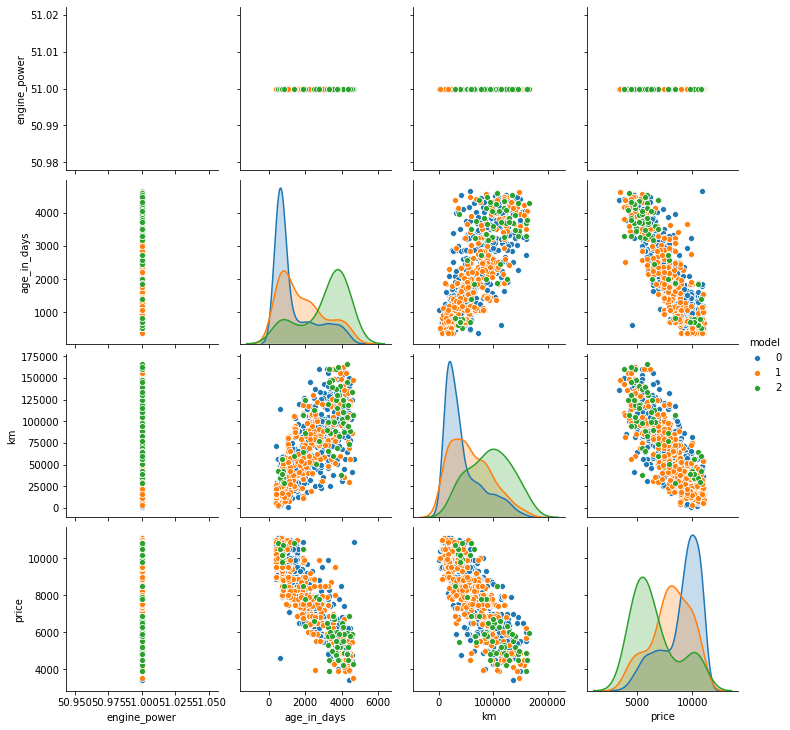

In [57]:
y = car_IQR_outlier['model']
# as you can see below all three car models are influenced by the correlations of age_in_days,km and price
sns.pairplot(car_IQR_outlier, hue='model') 

In [58]:
car_IQR_outlier.describe()

,model,engine_power,age_in_days,km,price
count,1445.000000,1445.0,1445.000000,1445.000000,1445.000000
mean,0.312803,51.0,1540.778547,50054.350865,8727.425606
std,0.546085,0.0,1228.486278,37032.594905,1855.116152
min,0.000000,51.0,366.000000,1232.000000,3390.000000
25%,0.000000,51.0,670.000000,19570.000000,7450.000000
50%,0.000000,51.0,821.000000,37000.000000,9400.000000
75%,1.000000,51.0,2374.000000,73000.000000,10200.000000
max,2.000000,51.0,4658.000000,165600.000000,11100.000000


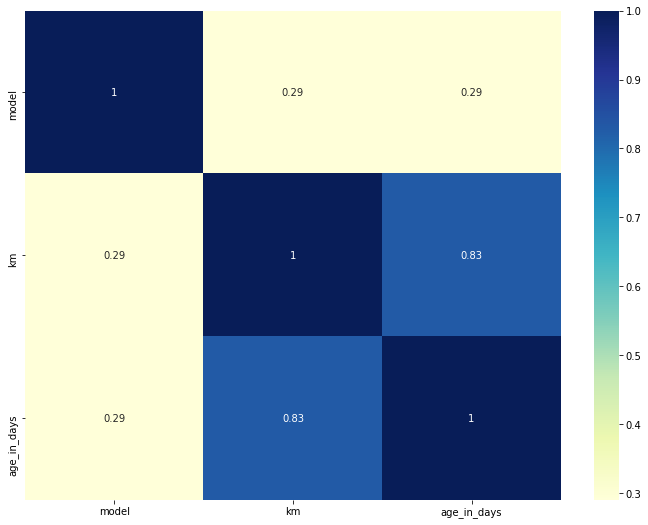

In [59]:
corr_matrix = car_IQR_outlier[['model','km','age_in_days']].corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu") # the matrix correlation without the engine_power which is not useful

## Prepare the model

In [60]:
X = car_IQR_outlier[['model','km','age_in_days']]
y = car_IQR_outlier['price']

In [61]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1156, 3)
y_train shape: (1156,)


In [72]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (289, 3)
y_test shape: (289,)


In [62]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
model,-134.014334
km,-0.018719
age_in_days,-0.852865


## Evaluate the model

In [63]:
y_pred = lr.predict(X_test)

In [64]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare1 = compare.head(30)
compare1

,Actual,Predicted
1406,8500,9517.246653
507,9450,10045.631106
202,10400,9972.988270
328,10950,10370.877150
1055,9550,10436.167655
1041,8900,9766.852502
1273,8900,8835.122553
664,8200,8676.816919
926,5990,6397.684126
359,10500,9699.402503


In [65]:
compare.describe()

,Actual,Predicted
count,289.000000,289.000000
mean,8639.692042,8679.428261
std,1873.109511,1716.336158
min,3900.000000,4386.122273
25%,7400.000000,7223.513346
50%,9400.000000,9528.981547
75%,10000.000000,10037.115476
max,11090.000000,10543.059063


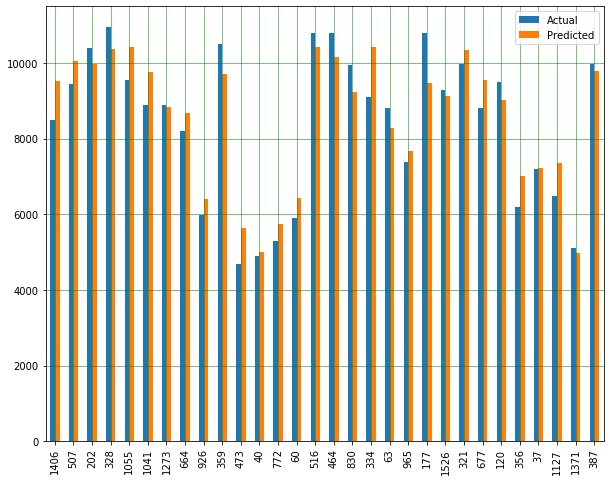

In [66]:
compare1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() # as we can see below the prediction is not bad

In [67]:
from sklearn.metrics import r2_score
round(sklearn.metrics.r2_score(y_test, y_pred), 2) # the model can explain 85% of the variation of the dependent variables

0.85

In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))#measure how large the residuals are being dispersed 

Mean Absolute Error: 592.7427470157699
Mean Squared Error: 534856.8649782678
Root Mean Squared Error: 731.3390902845737


In [69]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.85
